### Pokemon Games Analysis - Web Scraping - Beautiful Soup

Wanyun Yang

In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
pokemon_url = 'https://pokemondb.net/pokedex/all'
# Issue a simple HTTP request to get the webpage text
pokemon_page = requests.get(pokemon_url)
# Response code is returned
pokemon_page

<Response [200]>

In [3]:
pokemon_page_soup = BeautifulSoup(pokemon_page.text, 'html.parser')

In [4]:
# Use BeautifulSoup to extract all the table rows as a list
table_list=pokemon_page_soup.find_all(name="tr")

In [5]:
print("Number of rows (including the header): " + str(len(table_list)))

Number of rows (including the header): 1046


### Get Bulbasaur's ID Number, HP, Attack, Defense, Sp. Atk, Sp. Def, and Speed

In [6]:
# Save the first row of the table (bulbasaur) as a variable.
bulbasaur=pokemon_page_soup.find_all(name="tr")[1]
bulbasaur

<tr>
<td class="cell-num cell-fixed" data-sort-value="1"><span class="infocard-cell-img"><span class="img-fixed icon-pkmn" data-alt="Bulbasaur icon" data-src="https://img.pokemondb.net/sprites/sword-shield/icon/bulbasaur.png"></span></span><span class="infocard-cell-data">001</span></td> <td class="cell-name"><a class="ent-name" href="/pokedex/bulbasaur" title="View Pokedex for #001 Bulbasaur">Bulbasaur</a></td><td class="cell-icon"><a class="type-icon type-grass" href="/type/grass">Grass</a><br/> <a class="type-icon type-poison" href="/type/poison">Poison</a></td>
<td class="cell-total">318</td>
<td class="cell-num">45</td>
<td class="cell-num">49</td>
<td class="cell-num">49</td>
<td class="cell-num">65</td>
<td class="cell-num">65</td>
<td class="cell-num">45</td>
</tr>

In [7]:
# Observe the result above, all values are stored in the td classes.
bulbasaur_values_list = bulbasaur.find_all(name="td")
print(bulbasaur_values_list)
print("Number of results: " + str(len(bulbasaur_values_list)))

[<td class="cell-num cell-fixed" data-sort-value="1"><span class="infocard-cell-img"><span class="img-fixed icon-pkmn" data-alt="Bulbasaur icon" data-src="https://img.pokemondb.net/sprites/sword-shield/icon/bulbasaur.png"></span></span><span class="infocard-cell-data">001</span></td>, <td class="cell-name"><a class="ent-name" href="/pokedex/bulbasaur" title="View Pokedex for #001 Bulbasaur">Bulbasaur</a></td>, <td class="cell-icon"><a class="type-icon type-grass" href="/type/grass">Grass</a><br/> <a class="type-icon type-poison" href="/type/poison">Poison</a></td>, <td class="cell-total">318</td>, <td class="cell-num">45</td>, <td class="cell-num">49</td>, <td class="cell-num">49</td>, <td class="cell-num">65</td>, <td class="cell-num">65</td>, <td class="cell-num">45</td>]
Number of results: 10


In [8]:
# extract the text from Bulbasaur row
# name is the 2nd result
name_str = bulbasaur_values_list[1].text
print(name_str)

Bulbasaur


In [9]:
# extract the url from corresponding name and class 
url_str = bulbasaur.find(name="a", class_="ent-name").get('href')
url_str = pokemon_url[0:21] + url_str
print(url_str)

https://pokemondb.net/pokedex/bulbasaur


In [10]:
# type is the 3rd result
type_str = bulbasaur_values_list[2].text
print(type_str)

Grass Poison


In [11]:
# total points is the 3nd result
total_str = bulbasaur_values_list[3].text
print(total_str)

318


In [12]:
# store the ID Number, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed in a single list
num_list=[]
for i in range(7):
    num_list.append(bulbasaur.find_all(name="td", class_="cell-num")[i].text)
print(num_list)

['001', '45', '49', '49', '65', '65', '45']


### Create the df of all pokemons

In [13]:
from numpy import nan as NA
import numpy as np
import pandas as pd
pd.set_option('max_colwidth',150)

In [14]:
# Define a function that takes in a row of the pokedex table and returns it as a DataFrame with a single row. 
def pokemon_df(number):
    if number<=0:
        print('This pokemon does not exist.')
    else:
        # Extract the pokemon's name from the web
        pokemon=pokemon_page_soup.find_all(name="tr")[number]
        pokemon_values_list = pokemon.find_all(name="td")

        name_str = pokemon_values_list[1].text

        # Extract the pokemon's individual url address from the web
        url_str = pokemon.find(name="a", class_="ent-name").get('href')
        url_str = pokemon_url[0:21] + url_str


        # Extact the type(s) of the pokemon 
        type_str = pokemon_values_list[2].text

        # Extract the total points of the pokemon
        total_str = pokemon_values_list[3].text

        # The list of ID Number, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed
        num_list=[]
        for i in range(7):
            num_list.append(pokemon.find_all(name="td", class_="cell-num")[i].text)

        # Return result as a dataframe created from a NP array
        pokemon_row = np.array([[name_str, url_str, type_str, total_str, num_list[0],num_list[1],num_list[2],num_list[3],num_list[4],num_list[5],num_list[6]]])
        pokemon_df = pd.DataFrame(pokemon_row,columns = ['NAME', 'URL', 'TYPE(s)', 'TOTAL', 'ID', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed'])
        return pokemon_df

In [15]:
pokemon_df(1)

,NAME,URL,TYPE(s),TOTAL,ID,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed
0,Bulbasaur,https://pokemondb.net/pokedex/bulbasaur,Grass Poison,318,001,45,49,49,65,65,45


In [16]:
pokemon_ids = [i+1 for i in range(1045)]
# Loop over our route IDs and append to the empty dataframe
# Store dataframes in a list
dfs = []
for id in pokemon_ids:
    pokemon_scrape_res = pokemon_df(id)
    # Append df to list
    dfs.append(pokemon_scrape_res)

In [17]:
pokemon_scrape_df = pd.concat(dfs)
pokemon_scrape_df.head()

,NAME,URL,TYPE(s),TOTAL,ID,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed
0,Bulbasaur,https://pokemondb.net/pokedex/bulbasaur,Grass Poison,318,001,45,49,49,65,65,45
0,Ivysaur,https://pokemondb.net/pokedex/ivysaur,Grass Poison,405,002,60,62,63,80,80,60
0,Venusaur,https://pokemondb.net/pokedex/venusaur,Grass Poison,525,003,80,82,83,100,100,80
0,Venusaur Mega Venusaur,https://pokemondb.net/pokedex/venusaur,Grass Poison,625,003,80,100,123,122,120,80
0,Charmander,https://pokemondb.net/pokedex/charmander,Fire,309,004,39,52,43,60,50,65


### Cleaning the Pokedex

### Convert the datatypes

In [18]:
# I have added the column names
# Convert str to numericals
pokemon_scrape_df.loc[:,'TOTAL'] = pokemon_scrape_df.TOTAL.astype(int)
pokemon_scrape_df.loc[:,'HP'] = pokemon_scrape_df.HP.astype(int)
pokemon_scrape_df.loc[:,'Attack'] = pokemon_scrape_df.Attack.astype(int)
pokemon_scrape_df.loc[:,'Defense'] = pokemon_scrape_df.Defense.astype(int)
pokemon_scrape_df.loc[:,'Sp_Atk'] = pokemon_scrape_df.Sp_Atk.astype(int)
pokemon_scrape_df.loc[:,'Sp_Def'] = pokemon_scrape_df.Sp_Def.astype(int)
pokemon_scrape_df.loc[:,'Speed'] = pokemon_scrape_df.Speed.astype(int)
# Reorder the ID to the first column
pokemon_scrape_df = pokemon_scrape_df.set_index(['ID'])
pokemon_scrape_df.head()

,NAME,URL,TYPE(s),TOTAL,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed
ID,,,,,,,,,,
001,Bulbasaur,https://pokemondb.net/pokedex/bulbasaur,Grass Poison,318,45,49,49,65,65,45
002,Ivysaur,https://pokemondb.net/pokedex/ivysaur,Grass Poison,405,60,62,63,80,80,60
003,Venusaur,https://pokemondb.net/pokedex/venusaur,Grass Poison,525,80,82,83,100,100,80
003,Venusaur Mega Venusaur,https://pokemondb.net/pokedex/venusaur,Grass Poison,625,80,100,123,122,120,80
004,Charmander,https://pokemondb.net/pokedex/charmander,Fire,309,39,52,43,60,50,65


In [19]:
# check if the types changed
pokemon_scrape_df.dtypes

NAME       object
URL        object
TYPE(s)    object
TOTAL       int32
HP          int32
Attack      int32
Defense     int32
Sp_Atk      int32
Sp_Def      int32
Speed       int32
dtype: object

### How about the types of pokemons

In [20]:
#Create 18 dummy variables for each type of pokemon. 
pokemon_scrape_df['Normal'] = pokemon_scrape_df['TYPE(s)'].str.contains('Normal', regex=True)
pokemon_scrape_df['Fire'] = pokemon_scrape_df['TYPE(s)'].str.contains('Fire', regex=True)
pokemon_scrape_df['Water'] = pokemon_scrape_df['TYPE(s)'].str.contains('Water', regex=True)
pokemon_scrape_df['Electric'] = pokemon_scrape_df['TYPE(s)'].str.contains('Electric', regex=True)
pokemon_scrape_df['Grass'] = pokemon_scrape_df['TYPE(s)'].str.contains('Grass', regex=True)
pokemon_scrape_df['Ice'] = pokemon_scrape_df['TYPE(s)'].str.contains('Ice', regex=True)
pokemon_scrape_df['Fighting'] = pokemon_scrape_df['TYPE(s)'].str.contains('Fighting', regex=True)
pokemon_scrape_df['Poison'] = pokemon_scrape_df['TYPE(s)'].str.contains('Poison', regex=True)
pokemon_scrape_df['Ground'] = pokemon_scrape_df['TYPE(s)'].str.contains('Ground', regex=True)
pokemon_scrape_df['Flying'] = pokemon_scrape_df['TYPE(s)'].str.contains('Flying', regex=True)
pokemon_scrape_df['Psychic'] = pokemon_scrape_df['TYPE(s)'].str.contains('Psychic', regex=True)
pokemon_scrape_df['Bug'] = pokemon_scrape_df['TYPE(s)'].str.contains('Bug', regex=True)
pokemon_scrape_df['Rock'] = pokemon_scrape_df['TYPE(s)'].str.contains('Rock', regex=True)
pokemon_scrape_df['Ghost'] = pokemon_scrape_df['TYPE(s)'].str.contains('Ghost', regex=True)
pokemon_scrape_df['Dragon'] = pokemon_scrape_df['TYPE(s)'].str.contains('Dragon', regex=True)
pokemon_scrape_df['Dark'] = pokemon_scrape_df['TYPE(s)'].str.contains('Dark', regex=True)
pokemon_scrape_df['Steel'] = pokemon_scrape_df['TYPE(s)'].str.contains('Steel', regex=True)
pokemon_scrape_df['Fairy'] = pokemon_scrape_df['TYPE(s)'].str.contains('Fairy', regex=True)

In [21]:
pokemon_scrape_df

,NAME,URL,TYPE(s),TOTAL,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
ID,,,,,,,,,,,,,,,,,,,,,
001,Bulbasaur,https://pokemondb.net/pokedex/bulbasaur,Grass Poison,318,45,49,49,65,65,45,...,False,False,False,False,False,False,False,False,False,False
002,Ivysaur,https://pokemondb.net/pokedex/ivysaur,Grass Poison,405,60,62,63,80,80,60,...,False,False,False,False,False,False,False,False,False,False
003,Venusaur,https://pokemondb.net/pokedex/venusaur,Grass Poison,525,80,82,83,100,100,80,...,False,False,False,False,False,False,False,False,False,False
003,Venusaur Mega Venusaur,https://pokemondb.net/pokedex/venusaur,Grass Poison,625,80,100,123,122,120,80,...,False,False,False,False,False,False,False,False,False,False
004,Charmander,https://pokemondb.net/pokedex/charmander,Fire,309,39,52,43,60,50,65,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,Glastrier,https://pokemondb.net/pokedex/glastrier,Ice,580,100,145,130,65,110,30,...,False,False,False,False,False,False,False,False,False,False
897,Spectrier,https://pokemondb.net/pokedex/spectrier,Ghost,580,100,65,60,145,80,130,...,False,False,False,False,False,True,False,False,False,False
898,Calyrex,https://pokemondb.net/pokedex/calyrex,Psychic Grass,500,100,80,80,80,80,80,...,False,False,True,False,False,False,False,False,False,False


### Remove the duplicates & Mega forms

In [22]:
# Remove duplicate values of pokemon based on the URL. 
result_df = pokemon_scrape_df.drop_duplicates(subset=['URL'], keep='first')
result_df

,NAME,URL,TYPE(s),TOTAL,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
ID,,,,,,,,,,,,,,,,,,,,,
001,Bulbasaur,https://pokemondb.net/pokedex/bulbasaur,Grass Poison,318,45,49,49,65,65,45,...,False,False,False,False,False,False,False,False,False,False
002,Ivysaur,https://pokemondb.net/pokedex/ivysaur,Grass Poison,405,60,62,63,80,80,60,...,False,False,False,False,False,False,False,False,False,False
003,Venusaur,https://pokemondb.net/pokedex/venusaur,Grass Poison,525,80,82,83,100,100,80,...,False,False,False,False,False,False,False,False,False,False
004,Charmander,https://pokemondb.net/pokedex/charmander,Fire,309,39,52,43,60,50,65,...,False,False,False,False,False,False,False,False,False,False
005,Charmeleon,https://pokemondb.net/pokedex/charmeleon,Fire,405,58,64,58,80,65,80,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,Regieleki,https://pokemondb.net/pokedex/regieleki,Electric,580,80,100,50,100,50,200,...,False,False,False,False,False,False,False,False,False,False
895,Regidrago,https://pokemondb.net/pokedex/regidrago,Dragon,580,200,100,50,100,50,80,...,False,False,False,False,False,False,True,False,False,False
896,Glastrier,https://pokemondb.net/pokedex/glastrier,Ice,580,100,145,130,65,110,30,...,False,False,False,False,False,False,False,False,False,False


In [23]:
result_df.shape

(898, 28)

In [24]:
print('The dataset has '+str(898)+ ' rows now.')

The dataset has 898 rows now.


### Sampling

In [25]:
# Add a dummy variable to the DataFrame called "sample" that tags every 4th pokemon to be included in the sample. 
result_df=result_df.assign(sample = 'No') 

In [26]:
for i in range(0,887):
    if i % 4 == 3:
        result_df.iat[i, -1] = 'Yes'
result_df

,NAME,URL,TYPE(s),TOTAL,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy,sample
ID,,,,,,,,,,,,,,,,,,,,,
001,Bulbasaur,https://pokemondb.net/pokedex/bulbasaur,Grass Poison,318,45,49,49,65,65,45,...,False,False,False,False,False,False,False,False,False,No
002,Ivysaur,https://pokemondb.net/pokedex/ivysaur,Grass Poison,405,60,62,63,80,80,60,...,False,False,False,False,False,False,False,False,False,No
003,Venusaur,https://pokemondb.net/pokedex/venusaur,Grass Poison,525,80,82,83,100,100,80,...,False,False,False,False,False,False,False,False,False,No
004,Charmander,https://pokemondb.net/pokedex/charmander,Fire,309,39,52,43,60,50,65,...,False,False,False,False,False,False,False,False,False,Yes
005,Charmeleon,https://pokemondb.net/pokedex/charmeleon,Fire,405,58,64,58,80,65,80,...,False,False,False,False,False,False,False,False,False,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,Regieleki,https://pokemondb.net/pokedex/regieleki,Electric,580,80,100,50,100,50,200,...,False,False,False,False,False,False,False,False,False,No
895,Regidrago,https://pokemondb.net/pokedex/regidrago,Dragon,580,200,100,50,100,50,80,...,False,False,False,False,False,True,False,False,False,No
896,Glastrier,https://pokemondb.net/pokedex/glastrier,Ice,580,100,145,130,65,110,30,...,False,False,False,False,False,False,False,False,False,No


## Scraping Individual Pages

### Get the picture

In [27]:
from PIL import Image
import requests

In [28]:
# by changing index, the image of any pokemon can be shown
pokemon001_url = result_df.iat[0, 1]
# Issue a simple HTTP request to get the webpage text
pokemon001_page = requests.get(pokemon001_url)
# Response code is returned
pokemon001_page

<Response [200]>

In [29]:
pokemon001_page_soup = BeautifulSoup(pokemon001_page.text, 'html.parser')

In [30]:
# .find_all returns all matches as a list
imag001_url=pokemon001_page_soup.find(name="img").get('src')
imag001_url

'https://img.pokemondb.net/artwork/bulbasaur.jpg'

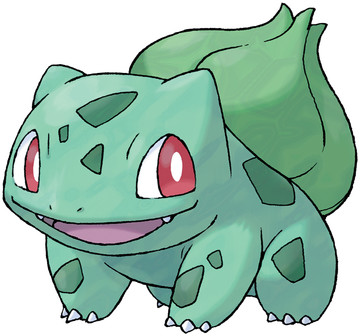

In [31]:
#Scrape the main image for Bulbasaur
Image.open(requests.get(imag001_url, stream=True).raw)

### Get the location table

In [32]:
# Extract the location table
tables = pd.read_html(requests.get(pokemon001_url, headers={'User-agent': 'Mozilla/5.0'}).text)

In [33]:
loc_df=tables[15]

In [34]:
loc_df.columns = ["GAMES", "PLACE"]
loc_df = loc_df.set_index(['GAMES'])
loc_df

,PLACE
GAMES,
RedBlue,Pallet Town
Yellow,Cerulean City
GoldSilverCrystal,Trade/migrate from another game
RubySapphire,Trade/migrate from another game
FireRedLeafGreen,Pallet Town
Emerald,Trade/migrate from another game
DiamondPearlPlatinum,Trade/migrate from another game
HeartGoldSoulSilver,Pallet Town
BlackWhiteBlack 2White 2,Trade/migrate from another game


In [35]:
# Transpose the DataFrame such that each column is a video game and each row/cell is the location where you find Bulbasaur in that game. 
loc_df=loc_df.transpose()
loc_df

GAMES,RedBlue,Yellow,GoldSilverCrystal,RubySapphire,FireRedLeafGreen,Emerald,DiamondPearlPlatinum,HeartGoldSoulSilver,BlackWhiteBlack 2White 2,XY,Omega RubyAlpha Sapphire,SunMoon,Ultra SunUltra Moon,Let's Go PikachuLet's Go Eevee,SwordShield
PLACE,Pallet Town,Cerulean City,Trade/migrate from another game,Trade/migrate from another game,Pallet Town,Trade/migrate from another game,Trade/migrate from another game,Pallet Town,Trade/migrate from another game,Lumiose City,Trade/migrate from another game,Trade/migrate from another game,Route 2,"Cerulean City, Viridian Forest",Location data not yet available


### Get the df of Pokemons that appear in XY game

In [36]:
import time

In [37]:
#create a new DataFrame with only the name for the pokemon and the 'XY' column
loc_df=[]
for i in range(898):
    if i>=807:
        if result_df.iat[i, -1]=='Yes':
            url = result_df.iat[i,1]
            name = result_df.iat[i,0]
            table = pd.read_html(requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text)
            loc_table=table[-1]
            loc_table.columns = ["GAMES", "PLACE"]
            loc_table = loc_table.set_index(['GAMES'])
            loc_table = loc_table.transpose()
            loc_xy = pd.DataFrame(columns=['XY'], index=range(1))
            loc_xy.insert(0, "NAME", [name], True)
            loc_df.append(loc_xy)
    elif result_df.iat[i, -1]=='Yes':
        url = result_df.iat[i,1]
        name = result_df.iat[i,0]
        table = pd.read_html(requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text)
        loc_table=table[-2]
        loc_table.columns = ["GAMES", "PLACE"]
        loc_table = loc_table.set_index(['GAMES'])
        loc_table = loc_table.transpose()
        if 'XY' in loc_table.columns:
            loc_xy = loc_table[['XY']]
            loc_xy.insert(0, "NAME", [name], True)
            loc_df.append(loc_xy)
        else:
            loc_xy = pd.DataFrame(columns=['XY'], index=range(1))
            loc_xy.insert(0, "NAME", [name], True)
            loc_df.append(loc_xy)
loc_dfs = pd.concat(loc_df)
loc_dfs = loc_dfs.set_index(['NAME'])
loc_dfs=loc_dfs.dropna(how='any') 
loc_dfs

GAMES,XY
NAME,
Charmander,Lumiose City
Wartortle,Evolve Squirtle
Butterfree,Evolve Caterpie/Metapod
Pidgey,"Route 2, 3"
Raticate,Trade/migrate from another game
...,...
Doublade,Evolve Honedge
Tyrunt,Ambrette Town
Goomy,Route 14


## Analysis

### Attack & Defense

In [38]:
#  Create a table that shows the average attack and defense for each type
type_df=[]
for t in range(10,28):
    count=0
    sum_att = 0
    sum_def = 0
    for i in range(890):
        if result_df.iat[i, t]==True:
            count+=1
            sum_att+=result_df.iat[i,5]
            sum_def+=result_df.iat[i,6]
            mean_att=sum_att/count
            mean_def=sum_def/count
    typeName=result_df.columns[t]
    type_t = pd.DataFrame(columns=['mean_att','mean_def'],index=range(1))
    type_t.insert(0, "TYPE", [typeName], True)
    type_t.iat[0,1]=mean_att
    type_t.iat[0,2]=mean_def
    type_df.append(type_t)
type_dfs = pd.concat(type_df)
type_dfs = type_dfs.set_index(['TYPE'])
type_dfs

,mean_att,mean_def
TYPE,,
Normal,73.1913,59.5304
Fire,80.9155,66.0282
Water,71.1702,72.5532
Electric,73.375,63.6429
Grass,73.3333,71.3619
Ice,77.7,74.95
Fighting,100.627,74.6271
Poison,68.5217,64.058
Ground,87.6716,84.6418


In [39]:
# Sort by attack
type_dfs.sort_values('mean_att')

,mean_att,mean_def
TYPE,,
Fairy,63.4074,69.0556
Psychic,65.3933,72
Bug,66.8929,68.9286
Poison,68.5217,64.058
Water,71.1702,72.5532
Normal,73.1913,59.5304
Grass,73.3333,71.3619
Electric,73.375,63.6429
Flying,75.8627,65.5294


In [40]:
# Sort by Defense
type_dfs.sort_values('mean_def')

,mean_att,mean_def
TYPE,,
Normal,73.1913,59.5304
Electric,73.375,63.6429
Poison,68.5217,64.058
Flying,75.8627,65.5294
Dark,88.7547,65.6981
Fire,80.9155,66.0282
Bug,66.8929,68.9286
Fairy,63.4074,69.0556
Grass,73.3333,71.3619


'Fairy' type has the lowest average Attack and 'Fighting' has the highest average Attack； 
'Normal' type has the lowest average Defense and 'Steel' has the highest average Defense

### Best locations to catch powerful pokemons

In [41]:
#Join the pokedex data to the  location DataFrame created in Step 3.4
newResult=pd.merge(result_df, loc_dfs, on='NAME', how='right')
newResult

,NAME,URL,TYPE(s),TOTAL,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy,sample,XY
0,Charmander,https://pokemondb.net/pokedex/charmander,Fire,309,39,52,43,60,50,65,...,False,False,False,False,False,False,False,False,Yes,Lumiose City
1,Wartortle,https://pokemondb.net/pokedex/wartortle,Water,405,59,63,80,65,80,58,...,False,False,False,False,False,False,False,False,Yes,Evolve Squirtle
2,Butterfree,https://pokemondb.net/pokedex/butterfree,Bug Flying,395,60,45,50,90,80,70,...,False,True,False,False,False,False,False,False,Yes,Evolve Caterpie/Metapod
3,Pidgey,https://pokemondb.net/pokedex/pidgey,Normal Flying,251,40,45,40,35,35,56,...,False,False,False,False,False,False,False,False,Yes,"Route 2, 3"
4,Raticate,https://pokemondb.net/pokedex/raticate,Normal,413,55,81,60,50,70,97,...,False,False,False,False,False,False,False,False,Yes,Trade/migrate from another game
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,Doublade,https://pokemondb.net/pokedex/doublade,Steel Ghost,448,59,110,150,45,49,35,...,False,False,False,True,False,False,True,False,Yes,Evolve Honedge
137,Tyrunt,https://pokemondb.net/pokedex/tyrunt,Rock Dragon,362,58,89,77,45,45,48,...,False,False,True,False,True,False,False,False,Yes,Ambrette Town
138,Goomy,https://pokemondb.net/pokedex/goomy,Dragon,300,45,50,35,55,75,40,...,False,False,False,False,True,False,False,False,Yes,Route 14
139,Phantump,https://pokemondb.net/pokedex/phantump,Ghost Grass,309,43,70,48,50,60,38,...,False,False,False,True,False,False,False,False,Yes,Route 16


In [42]:
pokemonXY=newResult[['NAME','XY','TOTAL']]
#pokemonXY=pokemonXY[pokemonXY.index<= 720]
pokemonXY

,NAME,XY,TOTAL
0,Charmander,Lumiose City,309
1,Wartortle,Evolve Squirtle,405
2,Butterfree,Evolve Caterpie/Metapod,395
3,Pidgey,"Route 2, 3",251
4,Raticate,Trade/migrate from another game,413
...,...,...,...
136,Doublade,Evolve Honedge,448
137,Tyrunt,Ambrette Town,362
138,Goomy,Route 14,300
139,Phantump,Route 16,309


In [43]:
def explode_str(df, col, sep):
    s = df[col]
    i = np.arange(len(s)).repeat(s.str.count(sep) + 1)
    return df.iloc[i].assign(**{col: sep.join(s).split(sep)})

In [44]:
pokemonXY=explode_str(pokemonXY, 'XY', ',')
pokemonXY

,NAME,XY,TOTAL
0,Charmander,Lumiose City,309
1,Wartortle,Evolve Squirtle,405
2,Butterfree,Evolve Caterpie/Metapod,395
3,Pidgey,Route 2,251
3,Pidgey,3,251
...,...,...,...
136,Doublade,Evolve Honedge,448
137,Tyrunt,Ambrette Town,362
138,Goomy,Route 14,300
139,Phantump,Route 16,309


In [45]:
#For the locations in pokemon X/Y, calculate the average total points for each location. 
pokemonXY.groupby(by='XY')['TOTAL'].mean().sort_values()

XY
 Lumiose City                 198.0
 Santalune Forest             200.0
 7                            224.0
Route 2                       225.5
Route 4                       229.0
                              ...  
Tower of Mastery              525.0
Evolve Chespin/Quilladin      530.0
Evolve Vanillite/Vanillish    535.0
 Roaming Kalos                580.0
Sea Spirit's Den              580.0
Name: TOTAL, Length: 83, dtype: float64

Location 'Sea Spirit's Den, Roaming Kalos' has the highest average total points at 580.

# END